In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datamodules import data_processors
from sklearn.feature_selection import mutual_info_regression
import sys
print(sys.version)

3.13.2 (main, Feb  4 2025, 00:00:00) [GCC 14.2.1 20250110 (Red Hat 14.2.1-7)]


In [2]:
N_archivos = 16
key_features = "x_"
path_rand = map(lambda x: "../input_data/cubic_" + str(x + 1) + ".csv", range(N_archivos))
datos_rand = (pd.read_csv(x) for x in path_rand)
datos_full = pd.concat(datos_rand, axis = 0)

In [3]:
datos_full.head()

,phi_a,x_K,eta,beta,phi_K,eig_0,eig_1,eig_2,eig_3,eig_4,...,eig_13,eig_14,eig_15,eig_16,eig_17,eig_18,eig_19,Parallelepiped,Cylinder,Ellipsoid
0,0.843666,0.647473,1.577259,1.574131,0.866533,0.552390,2.341186,2.982731,4.346947,4.543615,...,10.255629,10.934964,12.169362,12.639375,13.023291,17.260278,18.912029,1,0,0
1,0.618911,0.218057,1.216162,1.820191,1.350973,0.451902,1.069440,2.198825,3.912317,3.934114,...,11.230938,11.241764,11.468446,14.561622,14.919805,15.338283,15.666733,1,0,0
2,0.076877,0.245986,1.434582,2.036289,1.322259,0.104398,3.832743,4.758215,5.732612,5.807000,...,15.088024,15.429422,16.241738,16.394792,20.165109,25.500514,26.305482,1,0,0
3,1.459619,0.517388,1.481719,1.376496,1.027000,0.202136,2.142934,2.641222,2.779140,3.088002,...,10.969815,12.756643,13.922951,14.045571,15.047647,18.770442,19.392401,1,0,0
4,0.032508,0.949501,1.839938,0.803203,0.319154,0.002714,10.061990,13.963490,14.997477,17.405756,...,56.063736,70.470168,72.668095,76.780522,93.416045,97.561829,106.012724,1,0,0


In [4]:
N_eig = 19
features = ["eta", "beta"] + list(map(lambda x: key_features + str(x), range(N_eig + 1)))
target = ["phi_a", "phi_K"]
datos_full = data_processors.preprocess_data(datos_full, N_eig, target)
X = datos_full[features]
y = datos_full[target]

In [5]:
X.head()

,eta,beta,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_10,x_11,x_12,x_13,x_14,x_15,x_16,x_17,x_18,x_19
0,1.577259,1.574131,0.052876,0.070917,0.033923,0.072135,0.010399,0.007201,0.014744,0.043735,...,0.044254,0.003605,0.062714,0.011232,0.035921,0.065271,0.024853,0.020300,0.224037,0.087339
1,1.216162,1.820191,0.063830,0.004432,0.072088,0.109371,0.001391,0.050202,0.004016,0.031852,...,0.036307,0.021216,0.141992,0.012995,0.000691,0.014469,0.197436,0.022863,0.026711,0.020965
2,1.434582,2.036289,0.038015,0.107686,0.035182,0.037042,0.002828,0.078957,0.007227,0.043786,...,0.024378,0.078955,0.079060,0.006715,0.012978,0.030880,0.005818,0.143328,0.202825,0.030601
3,1.481719,1.376496,0.051567,0.058937,0.025695,0.007112,0.015927,0.054878,0.011324,0.097216,...,0.023561,0.006362,0.055864,0.047249,0.092141,0.060143,0.006323,0.051674,0.191972,0.032072
4,1.839938,0.803203,0.009433,0.085480,0.036802,0.009753,0.022717,0.070989,0.010528,0.033579,...,0.060522,0.001708,0.122370,0.014358,0.135893,0.020733,0.038792,0.156920,0.039106,0.079716


In [6]:
y.head()

,phi_a,phi_K
0,0.537095,0.551652
1,0.394011,0.860056
2,0.048942,0.841777
3,0.929222,0.653809
4,0.020696,0.203180


In [7]:
MI_data = dict()
for key in target:
    MI_data[key] = mutual_info_regression(X, y[key], n_jobs=-1)
    print("Finished: " + key)
#fin for

Finished: phi_a
Finished: phi_K


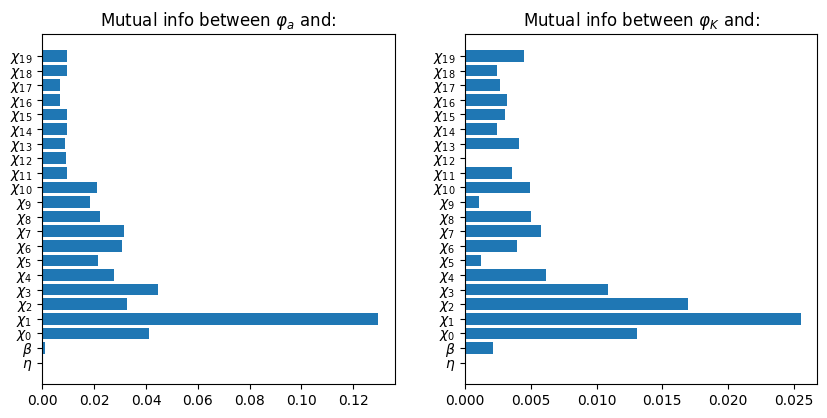

In [8]:
symbols_comp = dict(map(lambda x: ("x_" + str(x), r"$\chi_{%d}$" % x), range(N_eig+1)))
symbols_target = {"phi_K": r"$\varphi_K$", "phi_a": r"$\varphi_a$"}
symbols_features = {"eta": r"$\eta$", "beta": r"$\beta$", **symbols_comp}
fig = plt.figure(figsize=(10,10))
dim = int(np.ceil(len(MI_data.keys())**0.5))
for i,key in enumerate(target):
    ax = fig.add_subplot(dim,dim,i+1)
    ax.barh(symbols_features.values(), MI_data[key])
    ax.set_title("Mutual info between " + symbols_target[key] + " and:")
